In [1]:
import torch
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_iter(s):
    return int(s.split('/')[-1].split('_')[0])

In [3]:
def to_numpy(para):
    return para.cpu().numpy()

In [4]:
def dice_score(mask1,mask2):
    return np.sum(mask1[mask2==1])*2.0 / (np.sum(mask1) + np.sum(mask2))

In [5]:
def Reimagine(mask): 
    mask = to_numpy(mask)
    mask = mask.flatten()
    if len(mask)>576:
        mask = np.reshape(mask,(1024,-1))
    else:
        mask = np.reshape(mask,(32,-1))
    #print(mask)
    return mask


In [6]:
def load_masks(masks_dir):
    dump = []
    paths = os.listdir(masks_dir)
    for path in paths:
        if 'best' in path and not '100' in path:
            pathlist = path.split('_')
            pathlist.remove('best')
            mask_path = masks_dir+'_'.join(pathlist)
            masksize=get_iter(mask_path)
            dump1 = torch.load(mask_path, "cpu")
            dump.append((masksize,dump1['mask']))
    return dump
            

In [14]:
def combine_masks(total_masks):
    combined_masks = {}
    for (_,maskarab),(name,maskhin), (_,maskban) in zip(total_masks[0][1].items(),total_masks[1][1].items(),total_masks[2][1].items()):
        combined_masks[name] = [maskarab,maskban,maskhin]
    return combined_masks

            

In [13]:
total_masks = load_masks('/home/azhar/masks/masks_mtl/')#bangla
#total_masks = load_masks('/home/azhar/masks/0/')#arab
total_masks[0] = list(total_masks[0])#arab
total_masks[1] = list(total_masks[1])#hin
total_masks[2] = list(total_masks[2])#ban

[2, {'FeatureExtraction.ConvNet.0.weight': tensor([[[[False, False, False],
            [False, False, False],
            [False, False, False]]],
  
  
          [[[False, False, False],
            [False, False, False],
            [False, False, False]]],
  
  
          [[[False, False, False],
            [False, False, False],
            [False, False, False]]],
  
  
          [[[False, False, False],
            [False, False, False],
            [False, False, False]]],
  
  
          [[[False, False, False],
            [False, False, False],
            [False, False, False]]],
  
  
          [[[ True, False, False],
            [False, False, False],
            [False, False, False]]],
  
  
          [[[False, False, False],
            [False, False, False],
            [False, False, False]]],
  
  
          [[[False, False, False],
            [False, False, False],
            [False, False, False]]],
  
  
          [[[ True, False, False],
            [False, 

In [15]:
cm = combine_masks(total_masks)
cm

{'FeatureExtraction.ConvNet.0.weight': [tensor([[[[False, False, False],
            [False, False, False],
            [False, False, False]]],
  
  
          [[[False, False, False],
            [False, False, False],
            [False, False, False]]],
  
  
          [[[False, False, False],
            [False, False, False],
            [ True, False, False]]],
  
  
          [[[False, False, False],
            [False, False, False],
            [False, False, False]]],
  
  
          [[[False, False, False],
            [False, False, False],
            [False, False,  True]]],
  
  
          [[[ True, False, False],
            [False, False, False],
            [False, False, False]]],
  
  
          [[[False, False, False],
            [False, False, False],
            [False, False, False]]],
  
  
          [[[False, False, False],
            [False, False, False],
            [False, False, False]]],
  
  
          [[[ True, False, False],
            [False, Fal

FeatureExtraction.ConvNet.0.weight torch.Size([64, 1, 3, 3])
FeatureExtraction.ConvNet.3.weight torch.Size([128, 64, 3, 3])
FeatureExtraction.ConvNet.6.weight torch.Size([256, 128, 3, 3])
FeatureExtraction.ConvNet.8.weight torch.Size([256, 256, 3, 3])
FeatureExtraction.ConvNet.11.weight torch.Size([512, 256, 3, 3])
FeatureExtraction.ConvNet.12.weight torch.Size([512])
FeatureExtraction.ConvNet.14.weight torch.Size([512, 512, 3, 3])
FeatureExtraction.ConvNet.15.weight torch.Size([512])
FeatureExtraction.ConvNet.18.weight torch.Size([512, 512, 2, 2])
rnn_lang.0.rnn.weight_ih_l0 torch.Size([1024, 512])
rnn_lang.0.rnn.weight_hh_l0 torch.Size([1024, 256])
rnn_lang.0.rnn.weight_ih_l0_reverse torch.Size([1024, 512])
rnn_lang.0.rnn.weight_hh_l0_reverse torch.Size([1024, 256])
rnn_lang.0.linear.weight torch.Size([256, 512])
rnn_lang.1.rnn.weight_ih_l0 torch.Size([1024, 256])
rnn_lang.1.rnn.weight_hh_l0 torch.Size([1024, 256])
rnn_lang.1.rnn.weight_ih_l0_reverse torch.Size([1024, 256])
rnn_lang.

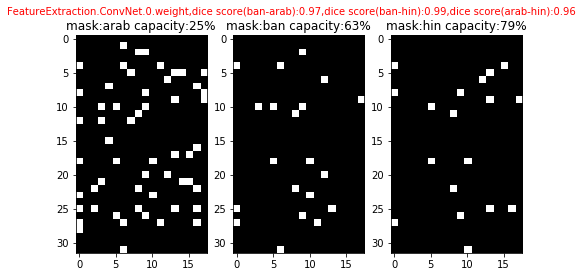

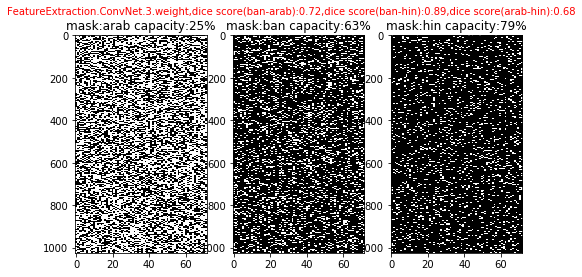

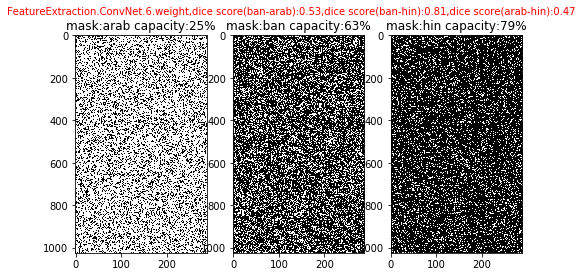

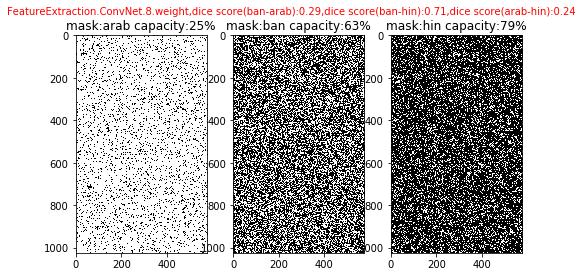

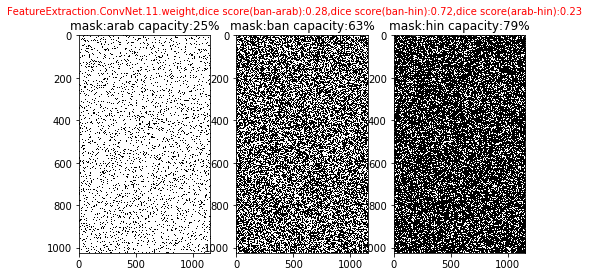

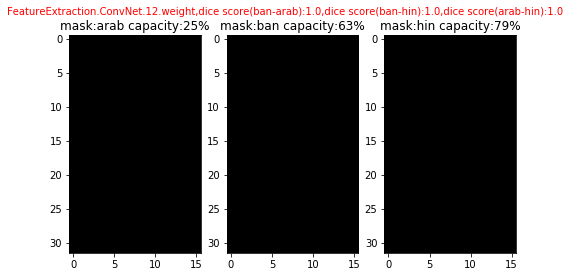

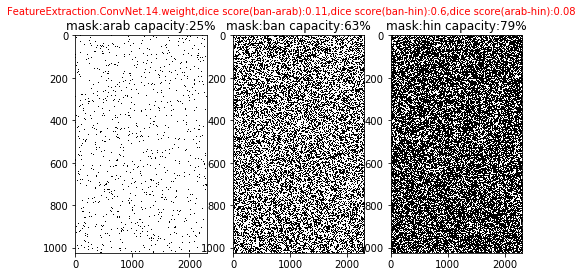

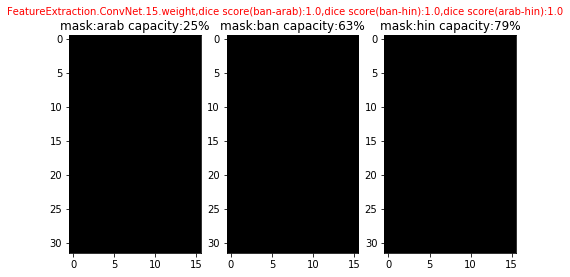

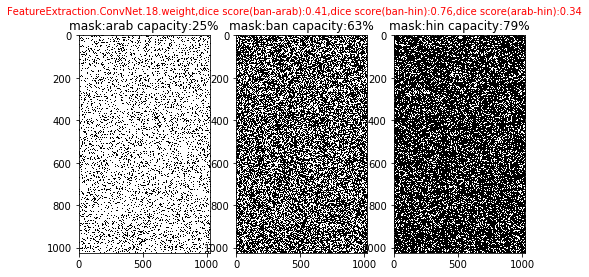

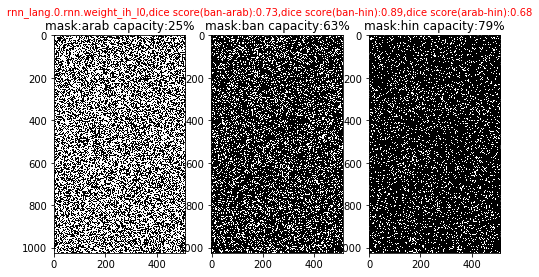

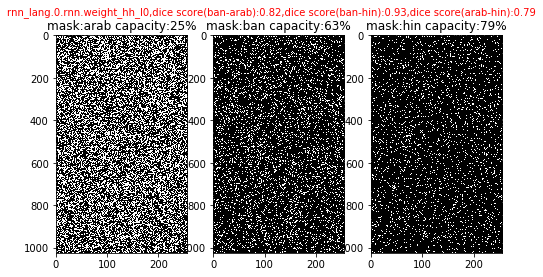

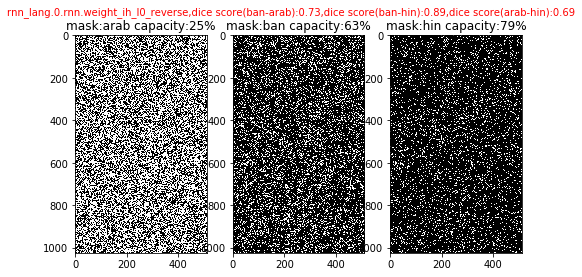

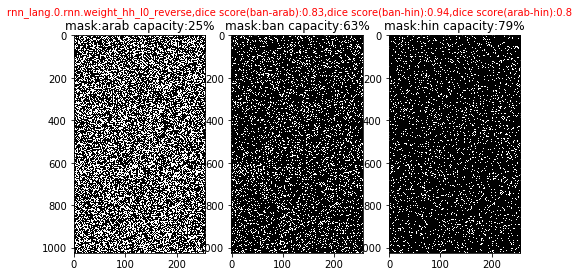

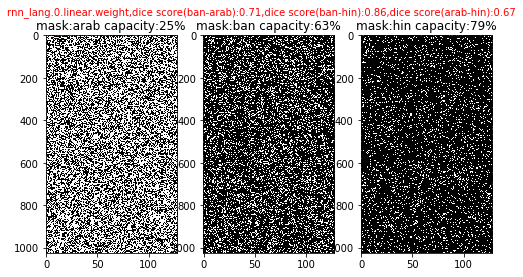

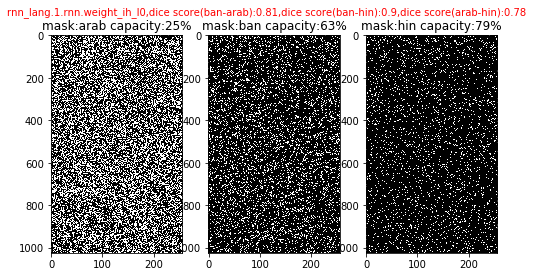

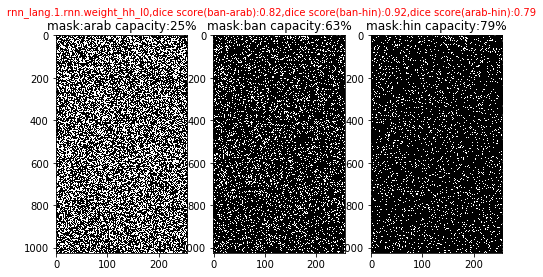

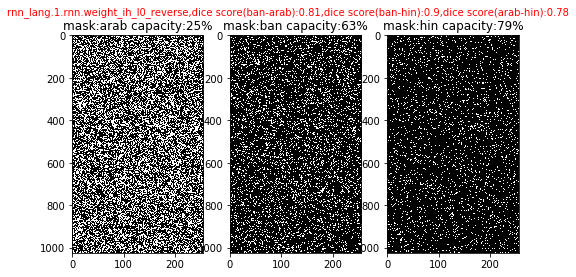

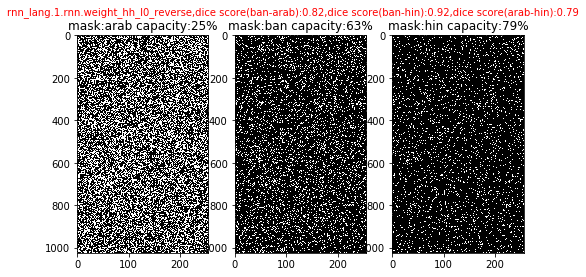

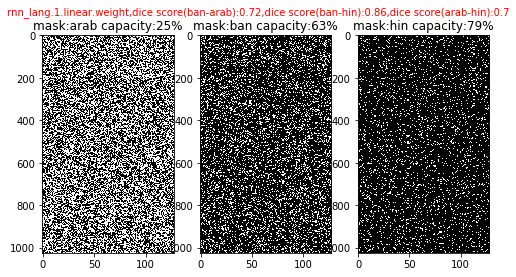

In [21]:
for name,masks in cm.items():
    print(name,masks[0].size())
    mask_arab = Reimagine(masks[0])
    mask_arab = 1*mask_arab
    mask_arab_d = -1*(mask_arab-1)
    mask_ban = Reimagine(masks[1])
    mask_ban = 1*mask_ban
    mask_ban_d = -1*(mask_ban-1)
    mask_hin = Reimagine(masks[2])
    mask_hin = 1*mask_hin
    mask_hin_d = -1*(mask_hin-1)
    ds_ban_arab = np.round(dice_score(mask_ban_d,mask_arab_d),2)
    ds_ban_hin = np.round(dice_score(mask_hin_d,mask_ban_d),2)
    ds_arab_hin = np.round(dice_score(mask_hin_d,mask_arab_d),2)
    fig=plt.figure(figsize=(8,4))
    fig.suptitle(name+',dice score(ban-arab):'+str(ds_ban_arab)+',dice score(ban-hin):'+str(ds_ban_hin)+',dice score(arab-hin):'+str(ds_arab_hin), fontsize=10,color='red')
    ax = fig.add_subplot(131)
    ax.set_title('mask:arab capacity:25%')
    ax.imshow(mask_arab, aspect='auto', cmap=plt.cm.gray, interpolation='nearest')
    ax = fig.add_subplot(132)
    ax.set_title('mask:ban capacity:63%')
    ax.imshow(mask_ban, aspect='auto', cmap=plt.cm.gray, interpolation='nearest')
    ax = fig.add_subplot(133)
    ax.set_title('mask:hin capacity:79%')
    ax.imshow(mask_hin, aspect='auto', cmap=plt.cm.gray, interpolation='nearest')
    
    
    
    